In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.copy_on_write = True
np.set_printoptions(precision=2, suppress=True)


# Load the Wine Quality Red dataset
data = pd.read_csv('datasets/50_Startups.csv', delimiter=",")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X[0:3])

   R&D Spend  Administration  Marketing Spend       State
0 165349.200      136897.800       471784.100    New York
1 162597.700      151377.590       443898.530  California
2 153441.510      101145.550       407934.540     Florida


In [2]:
# Categorize [State]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnsWithCategoricalData = [3]
transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), columnsWithCategoricalData)],
    remainder = 'passthrough')
categorizedData = transformer.fit(X)
categorizedData = transformer.transform(X)
print(categorizedData[0:3])

[[     0.        0.        1.   165349.2  136897.8  471784.1 ]
 [     1.        0.        0.   162597.7  151377.59 443898.53]
 [     0.        1.        0.   153441.51 101145.55 407934.54]]


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot

x_train, x_test, y_train, y_test = train_test_split(
    categorizedData, y, test_size = 0.2, random_state = 0)

In [4]:
# plot.scatter(x_train, y_train, color = 'red')

from sklearn.linear_model import LinearRegression
rgrs = LinearRegression()
rgrs.fit(x_train, y_train)



LinearRegression()

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
done


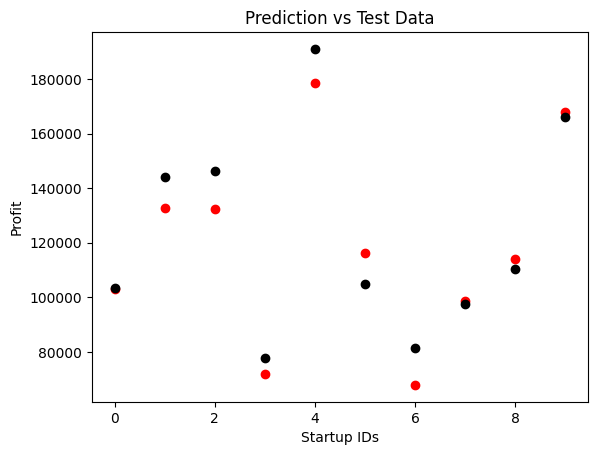

In [11]:

import matplotlib.pyplot as plot


plot.title("Prediction vs Test Data")
plot.xlabel("Startup IDs")
plot.ylabel("Profit")

predicted = rgrs.predict(x_test)
x = list(range(0, 10))
plot.scatter(x, predicted, color = 'red')
plot.scatter(x, y_test, color = 'black')

length = len(predicted)
x_reshaped = predicted.reshape(length, 1)
y_values = y_test.values
result = np.concatenate((x_reshaped, y_values.reshape(length, 1)), axis=1)
print(result)

# print(rgrs.intercept_)
# print(rgrs.coef_)
print('done')